# Exploring my steps and calorie data using googlefit api.

###  I was incredibly curious to analyse data about myself. Fortunately, I had downloaded the googlefit app on my mobile a few years back. The data includes my step and calorie information from 2018-07-25 to 2021-10-04 which has been used for the analysis. 

## I. Import necessary libraries and read the data.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 6)
from IPython.display import display


In [24]:
df_steps = pd.read_csv('steps.csv', index_col= [0])
df_calories = pd.read_csv('calories.csv', index_col= [0])


### Let's display the loaded steps data.

In [25]:
display(df_steps.head())
display(df_steps.shape)


,starttime_steps,endtime_steps,steps
0,2018-07-25 17:50:11,2018-07-25 17:51:11,12
1,2018-07-25 17:52:23,2018-07-25 17:54:01,49
2,2018-07-25 17:54:01,2018-07-25 17:54:05,3
3,2018-07-25 19:22:06,2018-07-25 19:23:06,13
4,2018-07-25 19:46:29,2018-07-25 19:47:29,15


(91999, 3)

### Let's display the loaded calories data.

In [26]:
display(df_calories.head())
display(df_calories.shape)

,starttime_calories,endtime_calories,calories
0,2018-07-25 17:47:57,2018-07-25 17:47:57,1284.524048
1,2018-07-25 17:58:57,2018-07-25 17:58:57,10.999066
2,2018-07-25 17:59:05,2018-07-25 17:59:05,0.445142
3,2018-07-25 18:13:56,2018-07-25 18:13:56,14.841949
4,2018-07-25 19:23:11,2018-07-25 19:23:11,69.257347


(52917, 3)

### Let's restructure the data in a specified format.

In [27]:
df_steps['start_date_steps'] = pd.to_datetime(df_steps['starttime_steps'])
df_steps['end_date_steps'] = pd.to_datetime(df_steps['endtime_steps'])
df_steps.drop(['starttime_steps', 'endtime_steps'], axis= 1, inplace=True)

df_steps = df_steps[['start_date_steps', 'end_date_steps', 'steps']]

#Replace null values with the mean of the data
df_steps['steps'] = df_steps['steps'].replace([0], np.mean(df_steps['steps']))

df_calories['start_date_calories'] = pd.to_datetime(df_calories['starttime_calories'])
df_calories['end_date_calories'] = pd.to_datetime(df_calories['endtime_calories'])
df_calories.drop(['starttime_calories', 'endtime_calories'], axis= 1, inplace=True)

df_calories = df_calories[['start_date_calories', 'end_date_calories', 'calories']]


### Got to have no null values for a good analysis.

In [28]:
display(df_steps.isna().sum())
display(df_steps['steps'].isin([0]).sum())
display(df_calories.isna().sum())
display(df_calories['calories'].isin([0]).sum())

start_date_steps    0
end_date_steps      0
steps               0
dtype: int64

0

start_date_calories    0
end_date_calories      0
calories               0
dtype: int64

0

## II. Exploratory data analysis


### Let's have a look at the number of observations for the steps and calorie data.

Text(0, 0.5, 'calories')

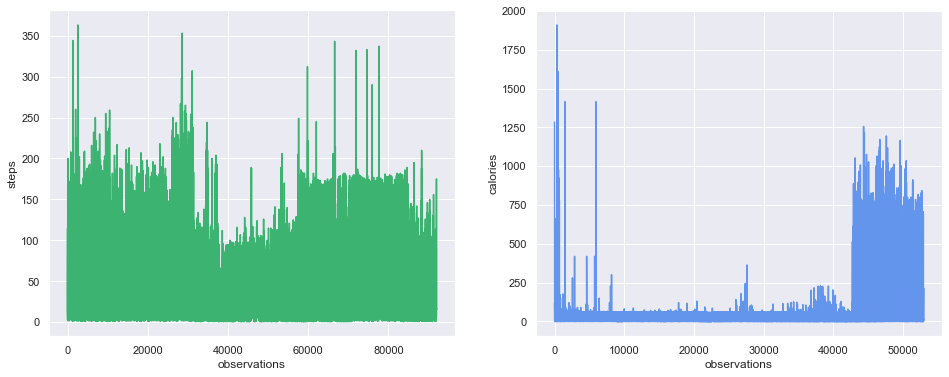

In [45]:
fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.plot(df_steps['steps'], color= 'mediumseagreen')
ax0.set_xlabel('observations')
ax0.set_ylabel('steps')

ax1.plot(df_calories['calories'], color= 'cornflowerblue')
ax1.set_xlabel('observations')
ax1.set_ylabel('calories')

Damn..... that's a lot of data.

### Let's now visualize and see the number of days the data was collected for.

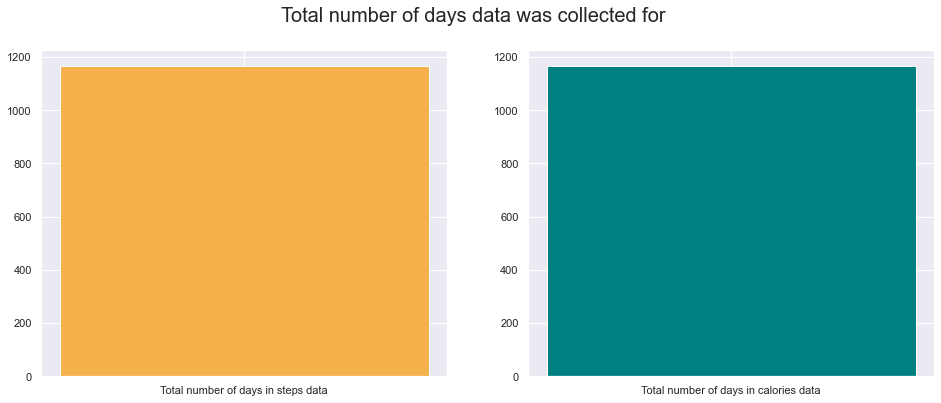

In [46]:
fig, (ax0, ax1) = plt.subplots(1, 2)

fig.suptitle('Total number of days data was collected for', size= 20)

df_steps['start_date_steps'] = df_steps['start_date_steps'].astype(np.datetime64)
df_steps_day = df_steps.resample('d', on= 'start_date_steps').sum()
df_steps_day.reset_index(inplace= True)
ax0.bar('Total number of days in steps data', sum(df_steps_day.value_counts()), color= '#F5B14C')


df_calories['start_date_calories'] = df_calories['start_date_calories'].astype(np.datetime64)
df_calories_day = df_calories.resample('d', on= 'start_date_calories').sum()
df_calories_day.reset_index(inplace= True)
df_calories_day['calories'] = df_calories_day['calories'].replace([0], np.mean(df_calories_day['calories']))
ax1.bar('Total number of days in calories data', sum(df_calories_day.value_counts()), color= '#008080')
plt.show()


The data was collected for 1168 days in total. That's 3.2 years, that's 38.3 months, that's 166.8 weeks, that's 1681920 minutes. Phew!!

### Let's see the hour in the day I'm most active (or least active). The number of hours follow the 24 hour clock cycle.

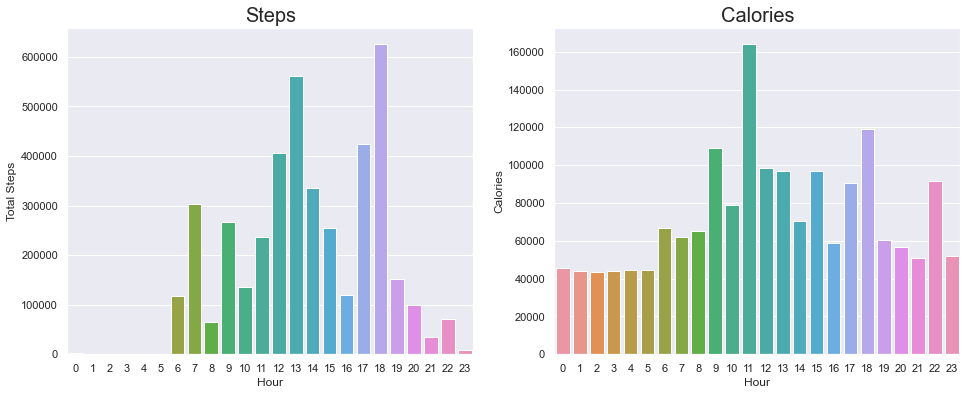

In [31]:
fig, (ax0, ax1) = plt.subplots(1, 2)

df_steps['start_date_steps'] = pd.to_datetime(df_steps['start_date_steps'])
df_steps_hour = pd.DataFrame([df_steps['start_date_steps'].dt.hour, df_steps['steps'].astype(int)])
df_steps_hour = df_steps_hour.transpose()
df_steps_hour_grouped = df_steps_hour.groupby('start_date_steps',as_index= False).sum()
sns.barplot(x= 'start_date_steps',y= 'steps', data= df_steps_hour_grouped, ax= ax0)
ax0.set_title('Steps', size= 20)
ax0.set_xlabel('Hour')
ax0.set_ylabel('Total Steps')


df_calories['start_date_calories'] = pd.to_datetime(df_calories['start_date_calories'])
df_calories_hour = pd.DataFrame([df_calories['start_date_calories'].dt.hour, df_calories['calories'].astype(int)])
df_calories_hour = df_calories_hour.transpose()
df_calories_hour_grouped = df_calories_hour.groupby('start_date_calories',as_index= False).sum()
sns.barplot(x= 'start_date_calories', y= 'calories', data= df_calories_hour_grouped, ax= ax1)
ax1.set_title('Calories', size= 20)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Calories')
plt.show()


It seems that I walk or run the most during the 18th hour of the day, whereas I burn the most calories in the 11th hour of the day. Hmmmm..... Interesting.

### How does my steps and calorie information stack up with respect to the days of a week? Let's have a look with violin plots.

Text(0, 0.5, 'Total Steps')

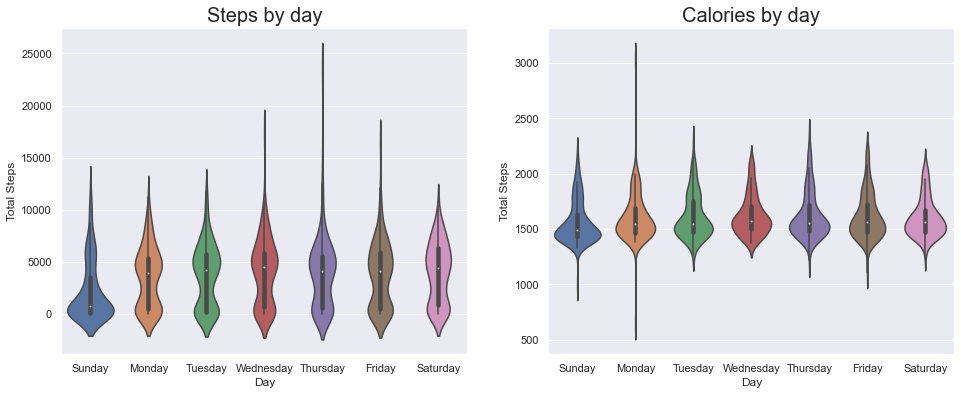

In [47]:
fig, (ax0, ax1) = plt.subplots(1, 2)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_steps_day['day_of_week'] = df_steps_day['start_date_steps'].dt.dayofweek
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 
        5: 'Saturday', 6: 'Sunday'}
df_steps_day['day_name'] = df_steps_day['day_of_week'].apply(lambda x: days[x])
sns.violinplot(x= 'day_name', y= 'steps', data= df_steps_day, ax= ax0, order= day_order)
ax0.set_title('Steps by day', size= 20)
ax0.set_xlabel('Day')
ax0.set_ylabel('Total Steps')

df_calories_day['day_of_week'] = df_calories_day['start_date_calories'].dt.dayofweek
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 
        5: 'Saturday', 6: 'Sunday'}
df_calories_day['day_name'] = df_calories_day['day_of_week'].apply(lambda x: days[x])
sns.violinplot(x= 'day_name', y= 'calories', data= df_calories_day, ax= ax1, order= day_order)
ax1.set_title('Calories by day', size= 20)
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Steps')



The plots suggests that on average I take less steps and burn less calories on a Sunday.

### Same information. Different plot.....a boxplot.

Text(0, 0.5, 'Total calories')

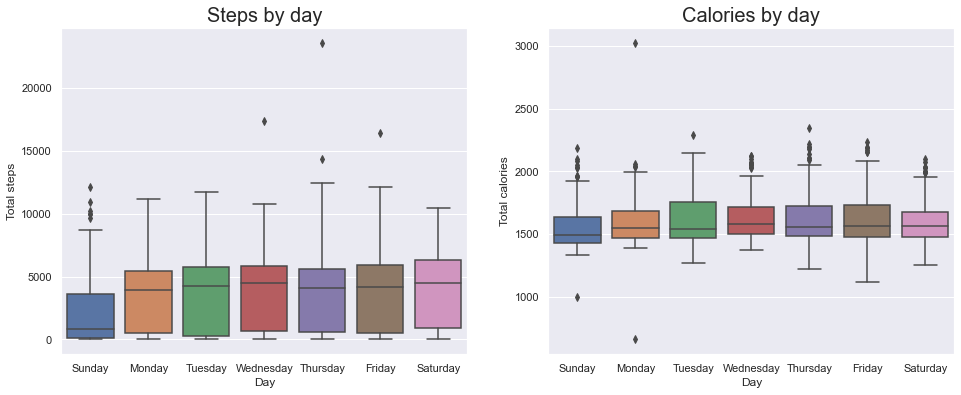

In [33]:
fig, (ax0, ax1) = plt.subplots(1, 2)

sns.boxplot(x= 'day_name', y= 'steps', data= df_steps_day, ax= ax0, order= day_order)
ax0.set_title('Steps by day', size= 20)
ax0.set_xlabel('Day')
ax0.set_ylabel('Total steps')

sns.boxplot(x= 'day_name', y= 'calories', data= df_calories_day, ax= ax1, order= day_order)
ax1.set_title('Calories by day', size= 20)
ax1.set_xlabel('Day')
ax1.set_ylabel('Total calories')


### Looking at the data through the years...

Text(0, 0.5, 'calories')

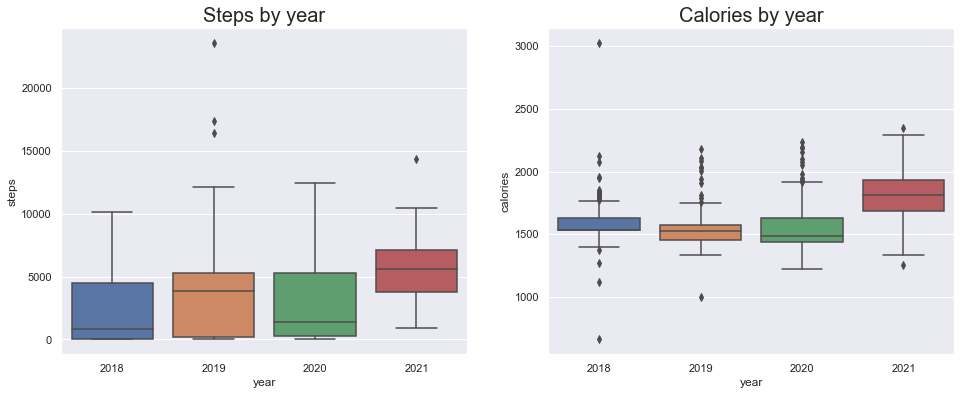

In [34]:
fig, (ax0, ax1) = plt.subplots(1, 2)


df_steps_day['year'] = df_steps_day['start_date_steps'].dt.year
sns.boxplot(x= 'year', y= 'steps', data= df_steps_day, ax= ax0)
ax0.set_title('Steps by year', size= 20)
ax0.set_xlabel('year')
ax0.set_ylabel('steps')


df_calories_day['year'] = df_calories_day['start_date_calories'].dt.year
sns.boxplot(x= 'year', y= 'calories', data= df_calories_day, ax= ax1)
ax1.set_title('Calories by year', size= 20)
ax1.set_xlabel('year')
ax1.set_ylabel('calories')


2021 seems to be my best year yaaaay.

## III. Model building and evaluation

### Let's first merge the two dataframes together to build the model.

In [35]:
df_day = pd.merge(df_steps_day, df_calories_day,left_index= True, right_index= True, how= 'outer' )
df_day['steps'] = df_day['steps'].replace([0], np.mean(df_day['steps']))
df_day.columns = ['start_date_steps', 'steps', 'day_of_week_steps','day_name_steps', 'year_steps', 'start_date_calories', 'calories', 'day_of_week_calories',  'day_name_calories', 'year_calories']
df_day.head()

,start_date_steps,steps,day_of_week_steps,day_name_steps,year_steps,start_date_calories,calories,day_of_week_calories,day_name_calories,year_calories
0,2018-07-25,243.0,2,Wednesday,2018,2018-07-25,1487.299721,2,Wednesday,2018
1,2018-07-26,4447.0,3,Thursday,2018,2018-07-26,1830.929766,3,Thursday,2018
2,2018-07-27,4322.0,4,Friday,2018,2018-07-27,1639.991384,4,Friday,2018
3,2018-07-28,5308.0,5,Saturday,2018,2018-07-28,1612.953483,5,Saturday,2018
4,2018-07-29,7456.0,6,Sunday,2018,2018-07-29,1838.370628,6,Sunday,2018


### Let's see the summary statistics of the data.

In [36]:
df_day.describe()

,steps,day_of_week_steps,year_steps,calories,day_of_week_calories,year_calories
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,3834.033473,3.001712,2019.650685,1608.460975,3.001712,2019.650685
std,2935.404990,2.000856,0.988139,196.419085,2.000856,0.988139
min,10.000000,0.000000,2018.000000,657.779972,0.000000,2018.000000
25%,785.500000,1.000000,2019.000000,1464.751718,1.000000,2019.000000
50%,3809.000000,3.000000,2020.000000,1551.816518,3.000000,2020.000000
75%,5656.500000,5.000000,2020.000000,1710.713059,5.000000,2020.000000
max,23606.000000,6.000000,2021.000000,3027.611511,6.000000,2021.000000


### Let's see how the pair of steps and calories compare with a pairplot.

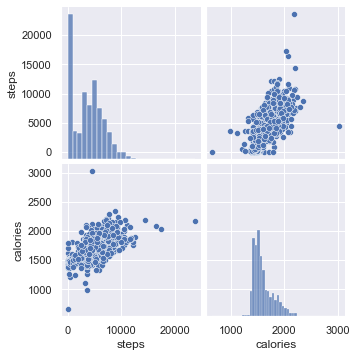

In [52]:
sns.pairplot(df_day[['steps', 'calories']])
plt.show()

We can see quite a bit of correlation from the plot. 

Let's compute the correlation numerically.

In [38]:
df_day[['steps', 'calories']].corr()

,steps,calories
steps,1.000000,0.715692
calories,0.715692,1.000000


71% correlation, hmmmm....interesting.

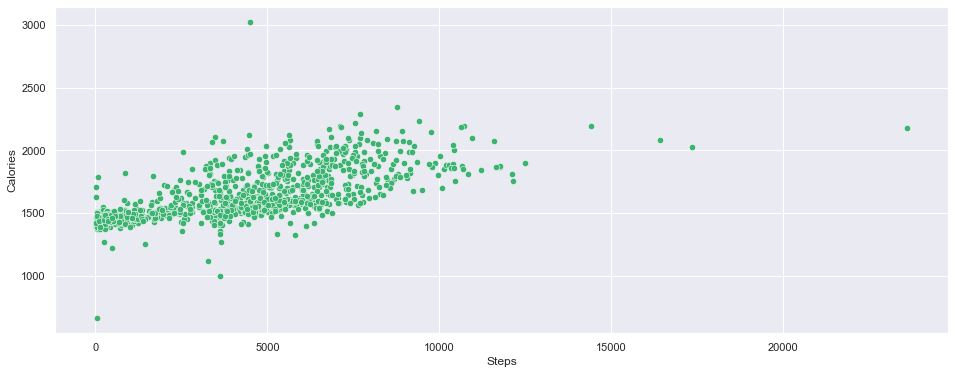

In [50]:
sns.scatterplot(x= df_day['steps'], y= df_day['calories'], color= 'mediumseagreen', s= 40)
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

### Now that we know that there is correlation that exists between steps and calorie data, we will plot a linear regression plot.

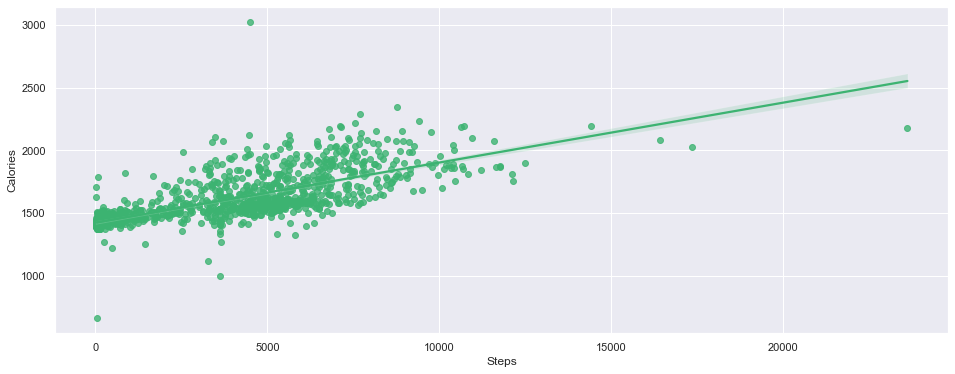

In [40]:
sns.regplot(x= df_day['steps'], y= df_day['calories'], color= 'mediumseagreen')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

Much of the data points pass through the regression slope.

From the data we will build a simple linear regression model to understand if steps and calorie information are truly related. 

## Is steps and calorie data truly related?

### We first split the data into train and test set and fit the linear regression model to the training data.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df_day['steps'].values.reshape(-1, 1)
y = df_day['calories']

reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

reg.fit(X_train, y_train)


LinearRegression()

### Print the coefficient.

In [42]:
print(reg.coef_)

[0.04720891]


### We predict and plot the graph of the prediction.

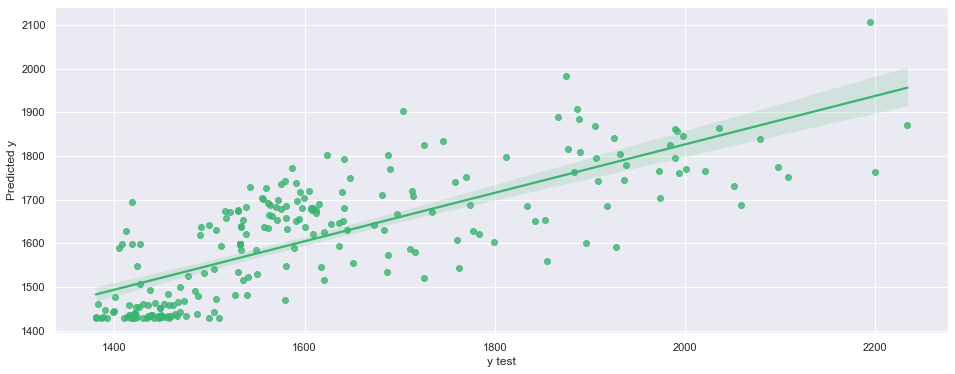

In [43]:
reg_pred = reg.predict(X_test)
sns.regplot(x= y_test, y= reg_pred, color = 'mediumseagreen')
plt.xlabel('y test')
plt.ylabel('Predicted y')
plt.show()


We can see that not a lot of points pass through the regression slope. 

### Quantifying the accuracy of our model.

In [44]:
display(reg.score(X_test, y_test))
np.sqrt(mean_squared_error(y_test, reg_pred))

0.5928455120696947

122.14577296034226

We get an accuracy of about 59% which is not bad for a simple linear regression model right out of the box.


## Conclusion

### We come to the conclusion that 59% of the time we can predict the number of calories burnt when the steps data is given using our linear regression model.